# Importing 

In [1]:
# pandas,numpy,warning
import numpy as np
import pandas as pd
import warnings

# matplotlib, seaborn,counter
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
from math import sin, cos, sqrt, atan2, radians

# machine learning
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

# model selection,sampling
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve,train_test_split
from imblearn.under_sampling import RandomUnderSampler as RUS     
from imblearn.over_sampling import RandomOverSampler as ROS
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import roc_curve,auc

# Preprocessing,accuracy
from sklearn.preprocessing import scale

In [2]:
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv("E:/kaggle_data/Cab_Fare/train.csv")
test=pd.read_csv("E:/kaggle_data/Cab_Fare/test.csv")

In [4]:
test.loc[test.store_and_fwd_flag==' ','store_and_fwd_flag']=np.nan

In [5]:
y=train["fare_amount"]
del train["fare_amount"]

In [6]:
# Merge train & test data
full=pd.concat([train,test])
full.index=range(200000)

In [7]:
del full['TID']

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
TID                   100000 non-null object
vendor_id             100000 non-null object
new_user              100000 non-null object
tolls_amount          100000 non-null float64
tip_amount            90007 non-null float64
mta_tax               100000 non-null float64
pickup_datetime       100000 non-null object
dropoff_datetime      100000 non-null object
passenger_count       100000 non-null int64
pickup_longitude      96966 non-null float64
pickup_latitude       97962 non-null float64
rate_code             100000 non-null int64
store_and_fwd_flag    64649 non-null object
dropoff_longitude     99693 non-null float64
dropoff_latitude      99522 non-null float64
payment_type          100000 non-null object
surcharge             94115 non-null float64
dtypes: float64(8), int64(2), object(7)
memory usage: 13.0+ MB


In [9]:
train.head(7)

,TID,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,surcharge
0,AIX000345001,DST000401,NO,0.0,1.4,0.5,2015-04-20 04:18:25,2015-04-20 04:24:20,1,-74.003939,40.742894,1,N,-73.993369,40.734247,CRD,0.5
1,AIX000345002,DST000401,NO,0.0,1.0,0.5,2015-04-19 18:16:07,2015-04-19 18:22:06,3,-73.973864,40.752194,1,N,-73.958701,40.772533,CRD,0.0
2,AIX000345003,DST000401,NO,0.0,0.0,0.5,2015-04-06 08:04:32,2015-04-06 08:10:05,2,-73.954406,40.764420,1,N,-73.970780,40.758350,CSH,0.0
3,AIX000345004,DST000532,NO,0.0,1.8,0.5,2015-04-10 09:48:00,2015-04-10 10:00:00,2,-73.962345,40.767215,1,NaN,-73.975512,40.756867,CRD,0.0
4,AIX000345005,DST000401,NO,0.0,0.0,0.5,2015-04-15 13:12:48,2015-04-15 13:26:30,1,-74.004657,40.707434,1,N,-73.999369,40.721517,CSH,0.0
5,AIX000345006,DST000401,NO,0.0,2.4,0.5,2015-04-23 22:04:11,2015-04-23 22:16:11,1,-73.995571,40.716019,1,N,-73.999968,40.743319,CRD,NaN
6,AIX000345007,DST000401,NO,0.0,NaN,0.5,2015-04-18 03:19:36,2015-04-18 03:54:22,1,-74.008049,40.740404,1,N,-73.931014,40.765785,CRD,0.5


In [10]:
train.describe()

,tolls_amount,tip_amount,mta_tax,passenger_count,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,surcharge
count,100000.000000,90007.000000,100000.000000,100000.000000,96966.000000,97962.000000,100000.000000,99693.000000,99522.000000,94115.000000
mean,0.262607,1.434922,0.498175,1.574660,-72.427421,39.899057,1.032010,-72.346081,39.856122,0.326515
std,1.244037,2.248553,0.030153,1.211702,10.588448,5.830341,0.259588,10.852702,5.974384,0.368323
min,0.000000,0.000000,0.000000,0.000000,-80.372524,0.000000,0.000000,-74.773668,0.000000,0.000000
25%,0.000000,0.000000,0.500000,1.000000,-73.992012,40.735131,1.000000,-73.991302,40.733917,0.000000
50%,0.000000,1.000000,0.500000,1.000000,-73.981593,40.753084,1.000000,-73.979660,40.753558,0.000000
75%,0.000000,2.000000,0.500000,2.000000,-73.966632,40.767304,1.000000,-73.962507,40.768435,0.500000
max,20.000000,100.110000,0.500000,6.000000,0.000000,42.906881,6.000000,0.000000,42.726397,2.500000


# Exploratory Data Analysis

In [11]:
# null value prediction

def null_predict(data):
    total=data.isnull().sum().sort_values(ascending=False)    
    percentage=((data.isnull().sum()*100)/data.isnull().count()).sort_values(ascending=False)
    missing=pd.concat([total,percentage],axis=1,keys=['Total','Percent'])
    return missing

    
null_predict(train)

,Total,Percent
store_and_fwd_flag,35351,35.351
tip_amount,9993,9.993
surcharge,5885,5.885
pickup_longitude,3034,3.034
pickup_latitude,2038,2.038
dropoff_latitude,478,0.478
dropoff_longitude,307,0.307
mta_tax,0,0.000
vendor_id,0,0.000
new_user,0,0.000


# Visualisation

In [12]:
temp=pd.concat([train,y],axis=1)

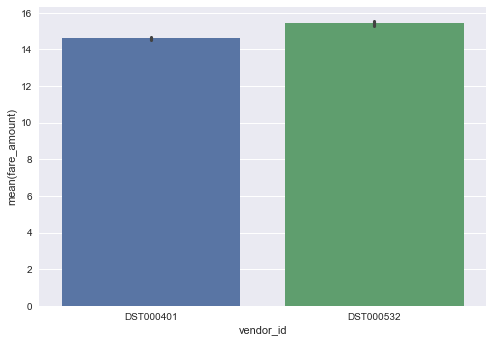

In [13]:
sns.barplot(x='vendor_id',y='fare_amount',data=temp)
plt.show()

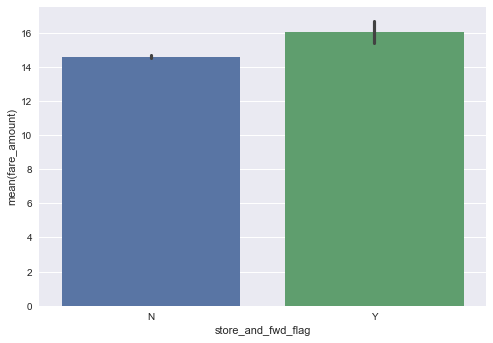

In [14]:
sns.barplot(x='store_and_fwd_flag',y='fare_amount',data=temp)
plt.show()

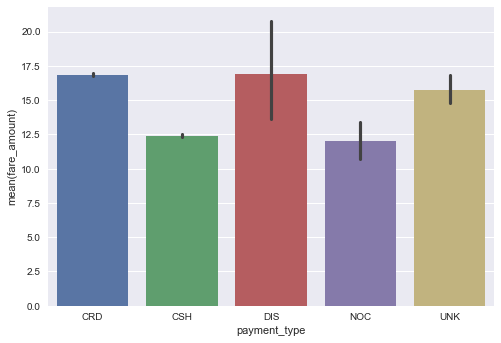

In [15]:
sns.barplot(x='payment_type',y='fare_amount',data=temp)
plt.show()

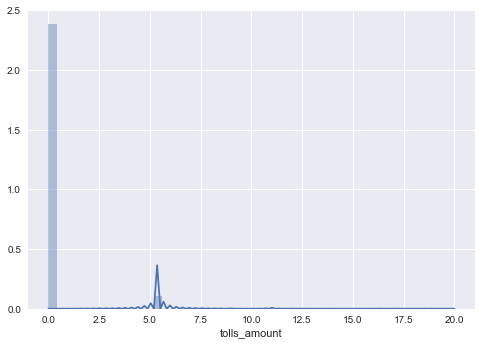

In [16]:
sns.distplot(temp['tolls_amount'])
plt.show()

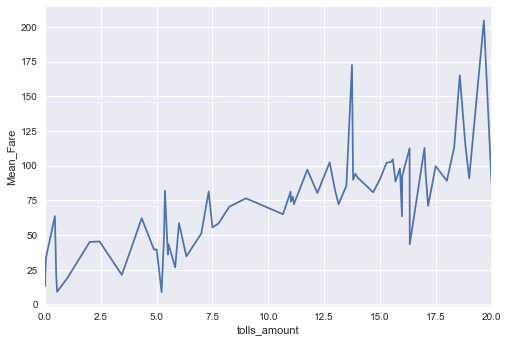

In [17]:
temp.groupby('tolls_amount').fare_amount.mean().plot(kind='line')
plt.ylabel("Mean_Fare")
plt.show()

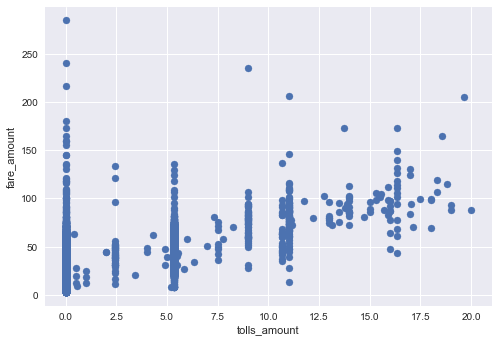

In [18]:
plt.scatter(x='tolls_amount',y='fare_amount',data=temp)
plt.xlabel("tolls_amount")
plt.ylabel("fare_amount")
plt.show()

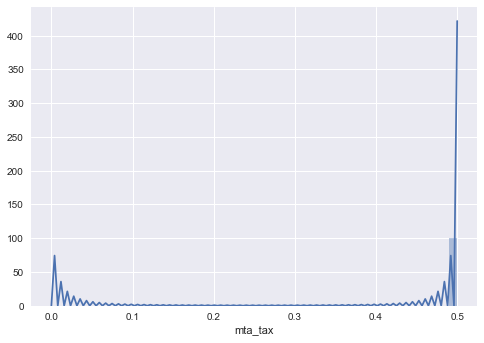

In [19]:
sns.distplot(temp['mta_tax'])
plt.show()

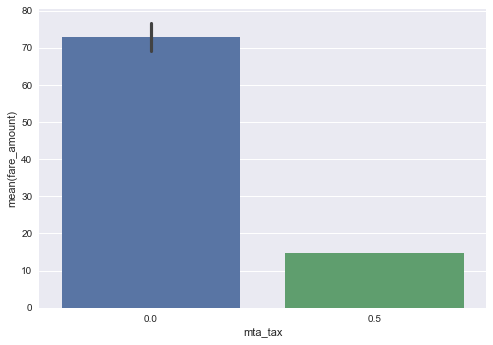

In [20]:
sns.barplot(x='mta_tax',y='fare_amount',data=temp)
plt.show()

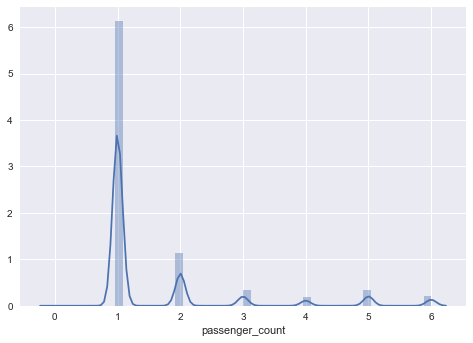

In [21]:
sns.distplot(temp['passenger_count'])
plt.show()

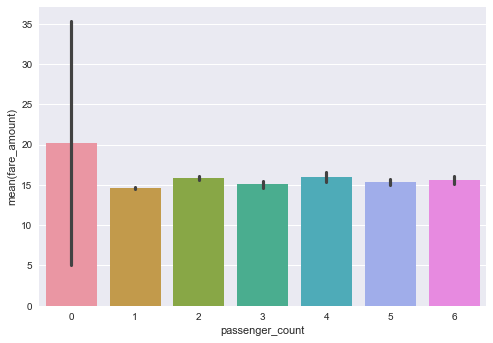

In [22]:
sns.barplot(x='passenger_count',y='fare_amount',data=temp)
plt.show()

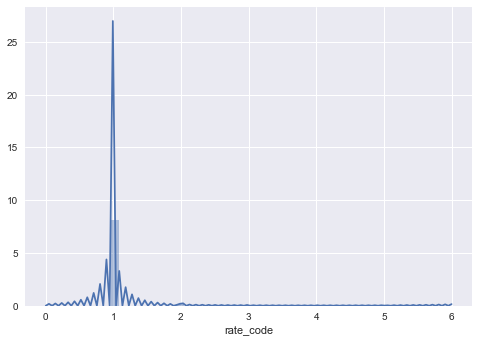

In [23]:
sns.distplot(temp['rate_code'])
plt.show()

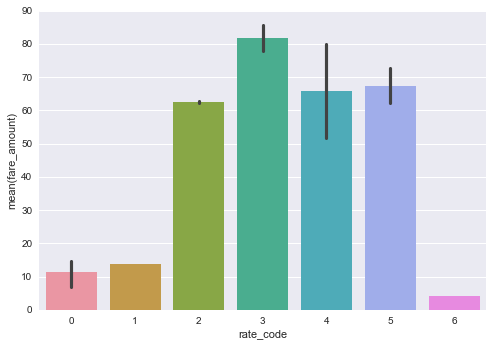

In [24]:
sns.barplot(x='rate_code',y='fare_amount',data=temp)
plt.show()

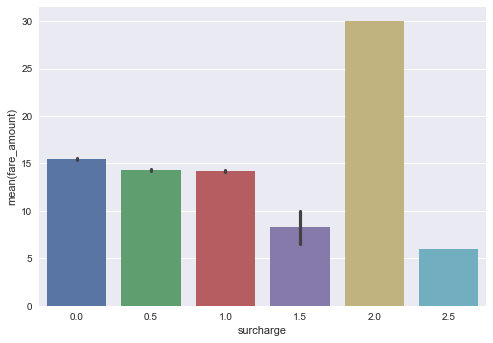

In [25]:
sns.barplot(x='surcharge',y='fare_amount',data=temp)
plt.show()

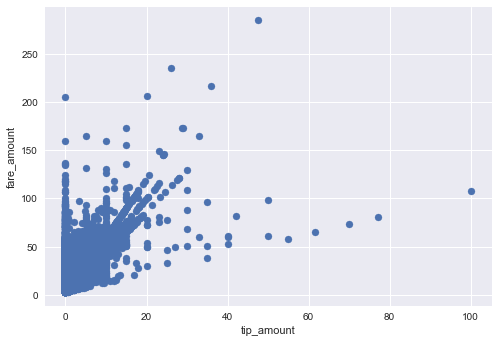

In [26]:
plt.scatter(x='tip_amount',y='fare_amount',data=temp)
plt.xlabel("tip_amount")
plt.ylabel("fare_amount")
plt.show()

# Imputation

In [27]:
# imputing store_and_fwd_flag

a=full.store_and_fwd_flag.value_counts().index.tolist()

In [28]:
full.loc[full.store_and_fwd_flag.isnull(),'store_and_fwd_flag']=np.random.choice(a,71043)

In [29]:
full.store_and_fwd_flag.value_counts()

N    162002
Y     37998
Name: store_and_fwd_flag, dtype: int64

In [30]:
# imputing surcharge

train=full.loc[full.surcharge.notnull(),['rate_code']]
test=full.loc[full.surcharge.isnull(),['rate_code']]
yr=full.loc[full.surcharge.notnull(),'surcharge']

train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [31]:
model=KNR()
model.fit(train,yr)
full.loc[full.surcharge.isnull(),'surcharge']=model.predict(test)

In [32]:
full.surcharge.value_counts(dropna=False)

 0.0    96694
 0.5    64217
 1.0    27483
 0.4    11552
 0.1       25
-0.5       16
-1.0        8
 1.5        2
 0.3        1
 2.5        1
 2.0        1
Name: surcharge, dtype: int64

In [33]:
full.loc[full.surcharge==0.4,'surcharge']=0.5
full.loc[full.surcharge==0.1,'surcharge']=0.0
b=[0.0,0.5,1.0]
full.loc[full['surcharge'].isin([-0.5,-1.0,1.5,0.3,2.5,2.0]),'surcharge']=np.random.choice(b,29)        

In [34]:
full.surcharge.value_counts(dropna=False)

0.0    96729
0.5    75777
1.0    27494
Name: surcharge, dtype: int64

In [35]:
c=full.dropoff_longitude.value_counts().index.tolist()[2:]

In [36]:
full.loc[(full['dropoff_longitude'].isnull())|(full['dropoff_longitude']==0.0)|(full['dropoff_longitude']==0.5),'dropoff_longitude']=np.random.choice(c,4371)

In [37]:
full.dropoff_longitude.isnull().any()

False

In [38]:
d=full.pickup_longitude.value_counts().index.tolist()[2:]

In [39]:
full.loc[(full['pickup_longitude'].isnull())|(full['pickup_longitude']==0.0)|(full['pickup_longitude']==0.5),'pickup_longitude']=np.random.choice(d,9594)

In [40]:
full.pickup_longitude.isnull().any()

False

In [41]:
e=full.pickup_latitude.value_counts().index.tolist()[2:]

In [42]:
full.loc[(full['pickup_latitude'].isnull())|(full['pickup_latitude']==0.0)|(full['pickup_latitude']==0.5),'pickup_latitude']=np.random.choice(e,7652)

In [43]:
full.pickup_latitude.isnull().any()

False

In [44]:
f=full.dropoff_latitude.value_counts().index.tolist()[2:]

In [45]:
full.loc[(full['dropoff_latitude'].isnull())|(full['dropoff_latitude']==0.0)|(full['dropoff_latitude']==0.5),'dropoff_latitude']=np.random.choice(f,4701)

In [46]:
full.dropoff_latitude.isnull().any()

False

In [47]:
del full['new_user']

# Feature Enginnering

In [48]:
full.pickup_datetime[0:5]

0    2015-04-20 04:18:25
1    2015-04-19 18:16:07
2    2015-04-06 08:04:32
3    2015-04-10 09:48:00
4    2015-04-15 13:12:48
Name: pickup_datetime, dtype: object

In [49]:
full.dropoff_datetime[0:5]

0    2015-04-20 04:24:20
1    2015-04-19 18:22:06
2    2015-04-06 08:10:05
3    2015-04-10 10:00:00
4    2015-04-15 13:26:30
Name: dropoff_datetime, dtype: object

In [50]:
# create trip time from pickup time & dropoff time

format="%Y-%m-%d %H:%M:%S"
time=[]
for i in range(200000):
    pick=datetime.strptime(full.pickup_datetime[i],format)
    drop=datetime.strptime(full.dropoff_datetime[i],format)
    time.append(drop-pick)

full['trip_duration']=pd.Series([round((i.total_seconds())/60,2) for i in time])    

In [51]:
full.trip_duration[0:10]

0     5.92
1     5.98
2     5.55
3    12.00
4    13.70
5    12.00
6    34.77
7     4.00
8    14.00
9    10.00
Name: trip_duration, dtype: float64

In [52]:
# create distance feature from latitude and longitude

In [53]:
R = 6371.0  #Earth radius(km)

lat1 = []
lon1 = []
lat2 = []
lon2 = []

for i in range(200000):
    lat1.append(radians(full['pickup_latitude'][i]))
    lon1.append(radians(full['pickup_longitude'][i]))
    lat2.append(radians(full['dropoff_latitude'][i]))
    lon2.append(radians(full['dropoff_longitude'][i]))

In [54]:
dlon = np.array(lon2) - np.array(lon1)
dlat = np.array(lat2) - np.array(lat1)

In [55]:
a=[sin(dlat[i] / 2)**2 + cos(lat1[i]) * cos(lat2[i]) * sin(dlon[i] / 2)**2 for i in range(200000)] 
B = [2 * atan2(sqrt(a[i]), sqrt(1 - a[i])) for i in range(200000)]

In [56]:
distance=[round(R*B[i],3) for i in range(200000)]
full['distance']=pd.Series(distance)

In [57]:
# imputing tip_amount

train=full.loc[full.tip_amount.notnull(),['payment_type','trip_duration','tolls_amount','rate_code','mta_tax']]
test=full.loc[full.tip_amount.isnull(),['payment_type','trip_duration','tolls_amount','rate_code','mta_tax']]
yr=full.loc[full.tip_amount.notnull(),'tip_amount']

train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [58]:
model=KNR()
model.fit(train,yr)
full.loc[full.tip_amount.isnull(),'tip_amount']=model.predict(test)

In [59]:
null_predict(full)

,Total,Percent
distance,0,0.0
pickup_longitude,0,0.0
tolls_amount,0,0.0
tip_amount,0,0.0
mta_tax,0,0.0
pickup_datetime,0,0.0
dropoff_datetime,0,0.0
passenger_count,0,0.0
pickup_latitude,0,0.0
trip_duration,0,0.0


In [60]:
data=full.loc[0:99999]
data1=full[100000:200000]

In [61]:
temp=pd.concat([data,y],axis=1)

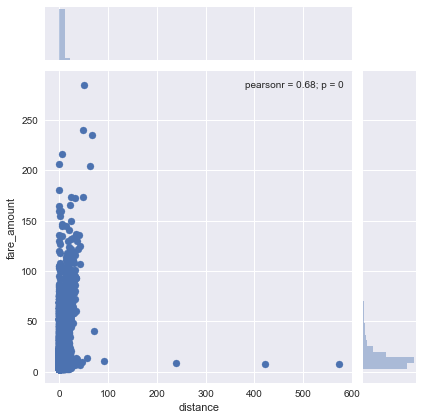

In [62]:
sns.jointplot(x='distance',y='fare_amount',data=temp)
plt.show()

# Feature Selection

In [63]:
data=data.drop(['pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)
temp=pd.get_dummies(data)

In [64]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 17 columns):
tolls_amount            100000 non-null float64
tip_amount              100000 non-null float64
mta_tax                 100000 non-null float64
passenger_count         100000 non-null int64
rate_code               100000 non-null int64
surcharge               100000 non-null float64
trip_duration           100000 non-null float64
distance                100000 non-null float64
vendor_id_DST000401     100000 non-null uint8
vendor_id_DST000532     100000 non-null uint8
store_and_fwd_flag_N    100000 non-null uint8
store_and_fwd_flag_Y    100000 non-null uint8
payment_type_CRD        100000 non-null uint8
payment_type_CSH        100000 non-null uint8
payment_type_DIS        100000 non-null uint8
payment_type_NOC        100000 non-null uint8
payment_type_UNK        100000 non-null uint8
dtypes: float64(6), int64(2), uint8(9)
memory usage: 10.2 MB


In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [66]:
#Create an SelectKBest object to select features with eight best ANOVA F-Values

fvalue_selector = SelectKBest(f_classif, k=8)

In [67]:
# Apply the SelectKBest object to the features and target

X_kbest = fvalue_selector.fit_transform(temp,y)

In [68]:
temp.head(10)

,tolls_amount,tip_amount,mta_tax,passenger_count,rate_code,surcharge,trip_duration,distance,vendor_id_DST000401,vendor_id_DST000532,store_and_fwd_flag_N,store_and_fwd_flag_Y,payment_type_CRD,payment_type_CSH,payment_type_DIS,payment_type_NOC,payment_type_UNK
0,0.0,1.40,0.5,1,1,0.5,5.92,1.311,1,0,1,0,1,0,0,0,0
1,0.0,1.00,0.5,3,1,0.0,5.98,2.597,1,0,1,0,1,0,0,0,0
2,0.0,0.00,0.5,2,1,0.0,5.55,1.535,1,0,1,0,0,1,0,0,0
3,0.0,1.80,0.5,2,1,0.0,12.00,1.598,0,1,0,1,1,0,0,0,0
4,0.0,0.00,0.5,1,1,0.0,13.70,1.628,1,0,1,0,0,1,0,0,0
5,0.0,2.40,0.5,1,1,0.5,12.00,3.058,1,0,1,0,1,0,0,0,0
6,0.0,5.99,0.5,1,1,0.5,34.77,7.076,1,0,1,0,1,0,0,0,0
7,0.0,0.00,0.5,1,1,0.5,4.00,10.035,0,1,1,0,0,1,0,0,0
8,0.0,3.20,0.5,5,1,0.5,14.00,6.051,0,1,0,1,1,0,0,0,0
9,0.0,0.00,0.5,2,1,0.0,10.00,1.275,0,1,0,1,0,1,0,0,0


In [69]:
X_kbest[0:10]

array([[  0.   ,   1.4  ,   0.5  ,   1.   ,   5.92 ,   1.311,   1.   ,   0.   ],
       [  0.   ,   1.   ,   0.5  ,   1.   ,   5.98 ,   2.597,   1.   ,   0.   ],
       [  0.   ,   0.   ,   0.5  ,   1.   ,   5.55 ,   1.535,   0.   ,   1.   ],
       [  0.   ,   1.8  ,   0.5  ,   1.   ,  12.   ,   1.598,   1.   ,   0.   ],
       [  0.   ,   0.   ,   0.5  ,   1.   ,  13.7  ,   1.628,   0.   ,   1.   ],
       [  0.   ,   2.4  ,   0.5  ,   1.   ,  12.   ,   3.058,   1.   ,   0.   ],
       [  0.   ,   5.99 ,   0.5  ,   1.   ,  34.77 ,   7.076,   1.   ,   0.   ],
       [  0.   ,   0.   ,   0.5  ,   1.   ,   4.   ,  10.035,   0.   ,   1.   ],
       [  0.   ,   3.2  ,   0.5  ,   1.   ,  14.   ,   6.051,   1.   ,   0.   ],
       [  0.   ,   0.   ,   0.5  ,   1.   ,  10.   ,   1.275,   0.   ,   1.   ]])

hence we select  'tolls_amount' , 'tip_amount' , 'mta_tax' , 'rate_code' , 'distance',  'trip_duration' , 'payment type'

# Building Model

In [70]:
data=data[['distance','trip_duration','rate_code','tip_amount','tolls_amount','mta_tax','payment_type']]
data1=data1[['distance','trip_duration','rate_code','tip_amount','tolls_amount','mta_tax','payment_type']]

In [71]:
train=pd.get_dummies(data)
test=pd.get_dummies(data1)

In [72]:
train.columns

Index([u'distance', u'trip_duration', u'rate_code', u'tip_amount',
       u'tolls_amount', u'mta_tax', u'payment_type_CRD', u'payment_type_CSH',
       u'payment_type_DIS', u'payment_type_NOC', u'payment_type_UNK'],
      dtype='object')

In [73]:
del train['payment_type_UNK']

In [74]:
train_x,test_x,train_y,test_y=train_test_split(train,y,test_size=.3,random_state=42)

In [75]:
model=RandomForestRegressor(random_state=42)
model.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [76]:
model.score(train_x,train_y)

0.99001698388562864

In [77]:
model.score(test_x,test_y)

0.94345626287109896

Feature ranking:
1. feature 0 (0.498252)
2. feature 1 (0.228850)
3. feature 2 (0.149912)
4. feature 3 (0.096923)
5. feature 4 (0.022470)
6. feature 5 (0.001037)
7. feature 8 (0.000785)
8. feature 7 (0.000652)
9. feature 9 (0.000652)
10. feature 6 (0.000467)


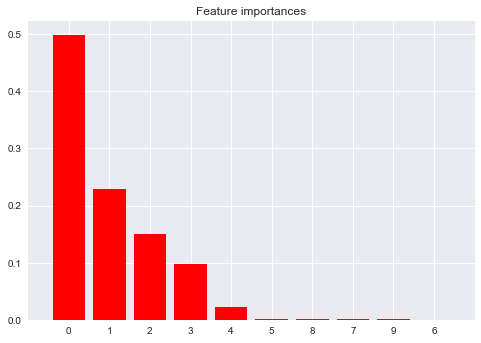

In [78]:
importances = model.feature_importances_
std = np.std(importances)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances

plt.title("Feature importances")
plt.bar(range(train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(train.shape[1]), indices)
plt.xticks()
plt.xlim([-1, train.shape[1]])
plt.show()

In [79]:
##..Make model on GBM

model=GradientBoostingRegressor(random_state=42)
model.fit(train_x,train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [80]:
model.score(train_x,train_y)

0.95916820035927053

In [81]:
model.score(test_x,test_y)

0.94456761673797818

In [85]:
output=model.predict(test)

In [86]:
output

array([  5.27159717,   7.34350215,  10.86734736, ...,  52.6137316 ,
         9.50263082,   5.00695173])